

# Multiple Output Models using the Keras Functional API

 **[Wine Quality Dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)** from the **UCI machine learning repository**.


## Imports

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
# URL of the white wine dataset
URI = './winequality-white.csv'

# load the dataset from the URL
white_df = pd.read_csv(URI, sep=";")

# fill the `is_red` column with zeros.
white_df["is_red"] = 0

# keep only the first of duplicate items
white_df = white_df.drop_duplicates(keep='first')

In [3]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,0


In [4]:
print(white_df.alcohol[0])
print(white_df.alcohol[100])

8.8
9.1


In [5]:
# URL of the red wine dataset
URI = './winequality-red.csv'

# load the dataset from the URL
red_df = pd.read_csv(URI, sep=";")

# fill the `is_red` column with ones.
red_df["is_red"] = 1

# keep only the first of duplicate items
red_df = red_df.drop_duplicates(keep='first')


In [6]:
print(red_df.alcohol[0])
print(red_df.alcohol[100])


9.4
10.2


In [7]:
df = pd.concat([red_df, white_df], ignore_index=True)

In [8]:
print(df.alcohol[0])
print(df.alcohol[100])


9.4
9.5


In [9]:
#df = df.iloc[np.random.permutation(len(df))]

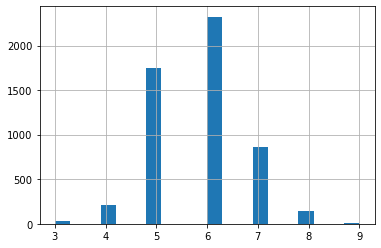

In [10]:
df['quality'].hist(bins=20);

In [11]:
df['quality'].describe()

count    5320.000000
mean        5.795677
std         0.879772
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

In [12]:
# get data with wine quality greater than 4 and less than 8
df = df[(df['quality'] > 4) & (df['quality'] < 8 )]

# reset index and drop the old one
df = df.reset_index(drop=True)

In [13]:
print(df.alcohol[0])
print(df.alcohol[100])

9.4
10.9


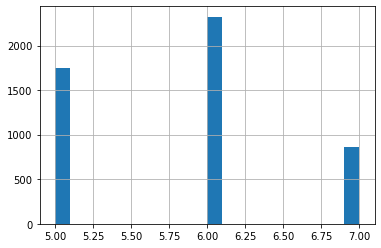

In [14]:
df['quality'].hist(bins=20);

In [15]:
# split df into 80:20 train and test sets
train, test = train_test_split(df, test_size=0.2, random_state = 1)
                               
# split train into 80:20 train and val sets
train, val = train_test_split(train, test_size=0.2, random_state = 1)

In [16]:
train_stats = train.describe()
train_stats.pop('is_red')
train_stats.pop('quality')
train_stats = train_stats.transpose()

In [17]:
train_stats

,count,mean,std,min,25%,50%,75%,max
fixed acidity,3155.0,7.221616,1.325297,3.80000,6.40000,7.00000,7.7000,15.60000
volatile acidity,3155.0,0.338929,0.162476,0.08000,0.23000,0.29000,0.4000,1.24000
citric acid,3155.0,0.321569,0.147970,0.00000,0.25000,0.31000,0.4000,1.66000
residual sugar,3155.0,5.155911,4.639632,0.60000,1.80000,2.80000,7.6500,65.80000
chlorides,3155.0,0.056976,0.036802,0.01200,0.03800,0.04700,0.0660,0.61100
free sulfur dioxide,3155.0,30.388590,17.236784,1.00000,17.00000,28.00000,41.0000,131.00000
total sulfur dioxide,3155.0,115.062282,56.706617,6.00000,75.00000,117.00000,156.0000,344.00000
density,3155.0,0.994633,0.003005,0.98711,0.99232,0.99481,0.9968,1.03898
pH,3155.0,3.223201,0.161272,2.72000,3.11000,3.21000,3.3300,4.01000
sulphates,3155.0,0.534051,0.149149,0.22000,0.43000,0.51000,0.6000,1.95000


In [18]:
def format_output(data):
    is_red = data.pop('is_red')
    is_red = np.array(is_red)
    quality = data.pop('quality')
    quality = np.array(quality)
    return (quality, is_red)

In [19]:
# format the output of the train set
train_Y = format_output(train)

# format the output of the val set
val_Y = format_output(val)
    
# format the output of the test set
test_Y = format_output(test)

In [20]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
225,7.5,0.65,0.18,7.0,0.088,27.0,94.0,0.99915,3.38,0.77,9.4
3557,6.3,0.27,0.29,12.2,0.044,59.0,196.0,0.99782,3.14,0.40,8.8
3825,8.8,0.27,0.25,5.0,0.024,52.0,99.0,0.99250,2.87,0.49,11.4
1740,6.4,0.45,0.07,1.1,0.030,10.0,131.0,0.99050,2.97,0.28,10.8
1221,7.2,0.53,0.13,2.0,0.058,18.0,22.0,0.99573,3.21,0.68,9.9


In [21]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [22]:
# normalize the train set
norm_train_X = norm(train)
    
# normalize the val set
norm_val_X = norm(val)
    
# normalize the test set
norm_test_X = norm(test)

In [23]:
def base_model(inputs):
    
    # connect a Dense layer with 128 neurons and a relu activation
    x = Dense(units='128', activation='relu')(inputs)
    
    # connect another Dense layer with 128 neurons and a relu activation
    x = Dense(units='128', activation='relu')(x)
    return x
  

In [24]:
def final_model(inputs):
    
    # get the base model
    x = base_model(inputs)

    # connect the output Dense layer for regression
    wine_quality = Dense(units='1', name='wine_quality')(x)

    # connect the output Dense layer for classification. this will use a sigmoid activation.
    wine_type = Dense(units='1', activation= 'sigmoid', name='wine_type')(x)

    # define the model using the input and output layers
    model = Model(inputs= inputs, outputs= (wine_quality, wine_type))

    return model

In [25]:
inputs = tf.keras.layers.Input(shape=(11,))
rms = tf.keras.optimizers.RMSprop(lr=0.0001)
model = final_model(inputs)

model.compile(optimizer=rms, 
              loss = {'wine_type' : 'binary_crossentropy',
                      'wine_quality' : 'mse'
                     },
              metrics = {'wine_type' : 'accuracy',
                         'wine_quality': tf.keras.metrics.RootMeanSquaredError()
                       }
             )


/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [26]:
history = model.fit(norm_train_X, train_Y,
                    epochs = 40, validation_data=(norm_val_X, val_Y))

Epoch 1/40
99/99 [==============================] - 1s 4ms/step - loss: 25.6562 - wine_quality_loss: 24.8462 - wine_type_loss: 0.8101 - wine_quality_root_mean_squared_error: 4.9846 - wine_type_accuracy: 0.2596 - val_loss: 18.4888 - val_wine_quality_loss: 17.6782 - val_wine_type_loss: 0.8105 - val_wine_quality_root_mean_squared_error: 4.2046 - val_wine_type_accuracy: 0.2700
Epoch 2/40
99/99 [==============================] - 0s 2ms/step - loss: 12.3696 - wine_quality_loss: 11.5721 - wine_type_loss: 0.7975 - wine_quality_root_mean_squared_error: 3.4018 - wine_type_accuracy: 0.2647 - val_loss: 7.1853 - val_wine_quality_loss: 6.4159 - val_wine_type_loss: 0.7694 - val_wine_quality_root_mean_squared_error: 2.5330 - val_wine_type_accuracy: 0.2839
Epoch 3/40
99/99 [==============================] - 0s 2ms/step - loss: 4.5572 - wine_quality_loss: 3.8476 - wine_type_loss: 0.7096 - wine_quality_root_mean_squared_error: 1.9615 - wine_type_accuracy: 0.3886 - val_loss: 3.0193 - val_wine_quality_loss

Epoch 23/40
99/99 [==============================] - 0s 1ms/step - loss: 0.6324 - wine_quality_loss: 0.5978 - wine_type_loss: 0.0346 - wine_quality_root_mean_squared_error: 0.7731 - wine_type_accuracy: 0.9930 - val_loss: 0.5988 - val_wine_quality_loss: 0.5640 - val_wine_type_loss: 0.0348 - val_wine_quality_root_mean_squared_error: 0.7510 - val_wine_type_accuracy: 0.9937
Epoch 24/40
99/99 [==============================] - 0s 2ms/step - loss: 0.6067 - wine_quality_loss: 0.5730 - wine_type_loss: 0.0337 - wine_quality_root_mean_squared_error: 0.7570 - wine_type_accuracy: 0.9933 - val_loss: 0.5678 - val_wine_quality_loss: 0.5335 - val_wine_type_loss: 0.0343 - val_wine_quality_root_mean_squared_error: 0.7304 - val_wine_type_accuracy: 0.9937
Epoch 25/40
99/99 [==============================] - 0s 2ms/step - loss: 0.5806 - wine_quality_loss: 0.5477 - wine_type_loss: 0.0329 - wine_quality_root_mean_squared_error: 0.7400 - wine_type_accuracy: 0.9933 - val_loss: 0.5453 - val_wine_quality_loss: 0

In [27]:
predictions = model.predict(norm_test_X)
quality_pred = predictions[0]
type_pred = predictions[1]

31/31 [==============================] - 0s 856us/step


In [28]:
print(quality_pred[0])

[5.714514]


In [29]:
print(type_pred[0])
print(type_pred[944])


[0.00135434]
[0.9998766]


In [30]:
def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0,ylim)
    plt.plot(history.history[metric_name],color='blue',label=metric_name)
    plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)


In [31]:
def plot_confusion_matrix(y_true, y_pred, title='', labels=[0,1]):
    cm = confusion_matrix(y_true, y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, format(cm[i, j], fmt),
                  horizontalalignment="center",
                  color="black" if cm[i, j] > thresh else "white")
    plt.show()

In [32]:
def plot_diff(y_true, y_pred, title = '' ):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.plot([-100, 100], [-100, 100])
    return plt

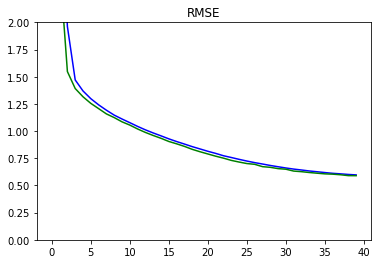

In [33]:
plot_metrics('wine_quality_root_mean_squared_error', 'RMSE', ylim=2)

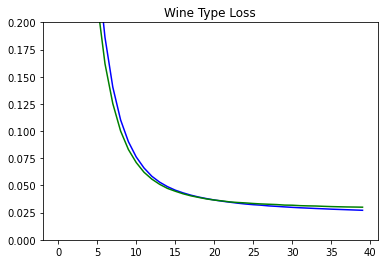

In [34]:
plot_metrics('wine_type_loss', 'Wine Type Loss', ylim=0.2)

<ipython-input-31-47bb6e202cb0>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-31-47bb6e202cb0>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


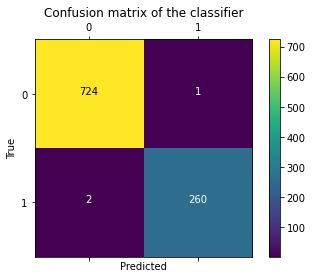

In [35]:
plot_confusion_matrix(test_Y[1], np.round(type_pred), title='Wine Type', labels = [0, 1])

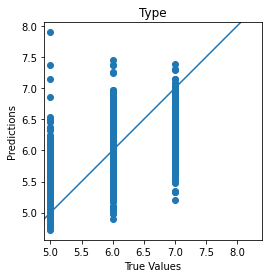

In [36]:
scatter_plot = plot_diff(test_Y[0], quality_pred, title='Type')